# Estadística Aplicada

Sesión 12 - 11 de Septiembre

David Eduardo Gómez Marín  -  1914352  - Grupo 041

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
## Librerías especializadas
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

In [5]:
#importar los datos
ejercicio_km = pd.read_excel('Ejercicio_km.xlsx')

In [6]:
ejercicio_km.head()

,Individuo,Tiempo,Evento
0,1,6,1
1,2,6,1
2,3,6,1
3,4,7,1
4,5,10,1


In [7]:
#Estimar modelo Kaplan-Meier
km1 = KaplanMeierFitter().fit(ejercicio_km['Tiempo'], ejercicio_km['Evento'])

In [8]:
km1.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,21,21
6.0,4,3,1,0,21
7.0,1,1,0,0,17
9.0,1,0,1,0,16
10.0,2,1,1,0,15
11.0,1,0,1,0,13
13.0,1,1,0,0,12
16.0,1,1,0,0,11
17.0,1,0,1,0,10


(0.0, 13.0)

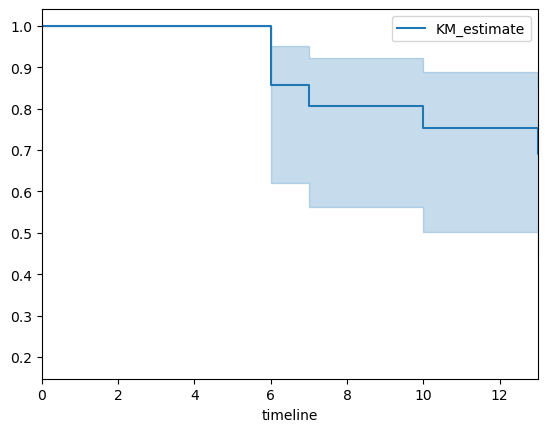

In [9]:
km1.plot_survival_function()
plt.xlim(0,13)

In [10]:
km1.median_survival_time_

23.0

Que la mediana sea 23 significa que en el tiempo 23 la mitad de los individuos (el 50%) les ha ocurrido el evento

In [11]:
##otros datos 
relacion = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/km_relacion.csv')

In [12]:
relacion.head()

,tratamiento,t,estado
0,0,1,1
1,0,1,1
2,0,2,1
3,0,2,1
4,0,3,1


Los datos de 'relación' corresponden al tiempo de supervivencia de una relación de pareja, el tiempo que pasa desde que inicia la relación hasta que termina. El tiempo está medido en semanas y está en la columna 't'. En ña variable 'estado', 1 significa que el evento ocurrió y 0 que hay censura. En la variable tratamiento, 1 es 'detallista' y 0 'No detallista'. En esta base detallista es quien hizo por lo menos un regalo semanal a su pareja (flores, peluche, paleta, etc)

In [13]:
#Realizar el estimador de kaplan-meier
km_todos = KaplanMeierFitter().fit(relacion['t'], relacion['estado'])

<Axes: xlabel='timeline'>

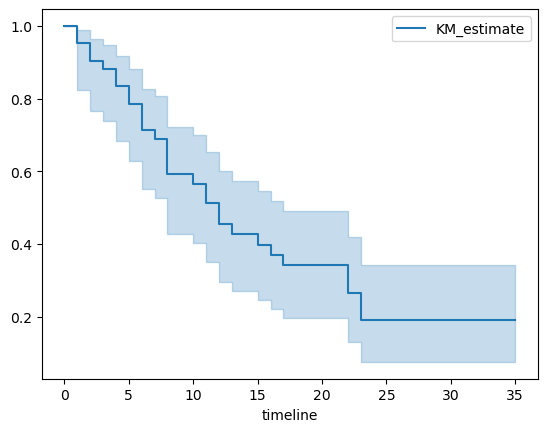

In [14]:
km_todos.plot_survival_function()

In [15]:
km_todos.median_survival_time_

12.0

En la semana 12, la mitad de las relaciones han terminado, o bien, solo la mitad de las relaciones de pareja siguen siendo pareja

In [17]:
# Separar detallistas y no detallistas
detallistas = relacion.query('tratamiento == 1')
Nodetallistas = relacion.query('tratamiento == 0')

In [20]:
#estimar el modelo
km_detallistas = KaplanMeierFitter().fit(detallistas['t'], detallistas['estado'])
km_Nodetallistas = KaplanMeierFitter().fit(Nodetallistas['t'], Nodetallistas['estado'])

Text(0.5, 1.0, 'Función de supervivencia de Kaplen Meier')

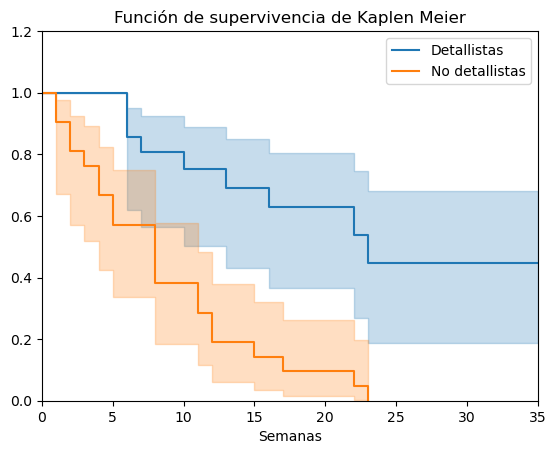

In [21]:
km_detallistas.plot_survival_function(label = 'Detallistas')
km_Nodetallistas.plot_survival_function(label = 'No detallistas')
plt.xlim(0,35)
plt.ylim(0, 1.2)
plt.xlabel('Semanas')
plt.title('Función de supervivencia de Kaplen Meier')

Vamos a hacer una prueba de hipótesis llamada (log rank test)\
$H0: s(1) = s(2)$ funciones de supervivencia iguales\
$Ha: s(1)\neq s(2)$ funciones de supervivencia distintas 

In [23]:
## LRT = logrank_test(tiempoG1, tiempoG2, eventoG1, eventoG2)
#Sean los del grupo 1 los detallistas G1=detallistas
#G2 = Nodetallistas

LRT = logrank_test(detallistas['t'], Nodetallistas['t'], detallistas['estado'], Nodetallistas['estado'])
LRT.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          16.79 <0.005     14.55

In [25]:
LRT.p_value.round(3)

0.0

Con un $\alpha = 0.05$ Rechazamos H0, las funciones de supervivencia spn distintas, la relación de los detallistas dura más que la relación de klos no detallistas.

La mitad de las relaciones de los no detallistas dura menos de 3 semanas vs la mitad ed las relaciones de los detallistas duran 23 semanas

In [26]:
km_detallistas.median_survival_time_

23.0

In [28]:
km_Nodetallistas.median_survival_time_

8.0